In [115]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [116]:
data=pd.read_csv("HR-Employee-Attrition.csv")

In [117]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [118]:
data.shape

(1470, 35)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [120]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [121]:
data1 = data.select_dtypes('object')
data1.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [122]:
data1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [123]:
data2 = data.select_dtypes('int64')
data2.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [124]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [125]:
def missingvalues(dataset):
    return dataset.isnull().sum()
missingvalues(data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [126]:
duplicate_rows = data.duplicated().any()
duplicate_rows

False

In [127]:
for i in data1:
    print('Unique values:', i, set(data[i]))

Unique values: Attrition {'Yes', 'No'}
Unique values: BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values: Department {'Sales', 'Research & Development', 'Human Resources'}
Unique values: EducationField {'Other', 'Technical Degree', 'Medical', 'Life Sciences', 'Human Resources', 'Marketing'}
Unique values: Gender {'Female', 'Male'}
Unique values: JobRole {'Sales Representative', 'Manufacturing Director', 'Manager', 'Laboratory Technician', 'Research Director', 'Research Scientist', 'Human Resources', 'Healthcare Representative', 'Sales Executive'}
Unique values: MaritalStatus {'Single', 'Married', 'Divorced'}
Unique values: Over18 {'Y'}
Unique values: OverTime {'Yes', 'No'}


In [128]:
data = data.drop(['MonthlyRate', 'DailyRate','HourlyRate','Over18','EmployeeCount','StandardHours','EmployeeNumber'], axis=1)

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [130]:
data1=data[["OverTime","MaritalStatus","JobRole","Gender","EducationField","Department","BusinessTravel","Age","TotalWorkingYears","Education","NumCompaniesWorked","DistanceFromHome"]]
data1.corr()

,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Age,TotalWorkingYears,Education,NumCompaniesWorked,DistanceFromHome
OverTime,1.000000,-0.017521,0.040662,-0.041924,0.002259,0.007481,0.016543,0.028062,0.012754,-0.020322,-0.020786,0.025514
MaritalStatus,-0.017521,1.000000,0.067957,-0.047183,0.014420,0.056073,0.024001,-0.095029,-0.077886,0.004053,-0.035505,-0.014437
JobRole,0.040662,0.067957,1.000000,-0.039723,0.015599,0.662431,0.002724,-0.122427,-0.145439,0.004236,-0.056368,-0.001015
Gender,-0.041924,-0.047183,-0.039723,1.000000,-0.002504,-0.041583,-0.032981,-0.036311,-0.046881,-0.016547,-0.039147,-0.001851
EducationField,0.002259,0.014420,0.015599,-0.002504,1.000000,0.013720,0.023724,-0.040873,-0.027848,-0.039592,-0.008663,0.002013
Department,0.007481,0.056073,0.662431,-0.041583,0.013720,1.000000,-0.009044,-0.031882,-0.015762,0.007996,-0.035882,0.017225
BusinessTravel,0.016543,0.024001,0.002724,-0.032981,0.023724,-0.009044,1.000000,0.024751,0.034226,0.000757,0.020875,-0.024469
Age,0.028062,-0.095029,-0.122427,-0.036311,-0.040873,-0.031882,0.024751,1.000000,0.680381,0.208034,0.299635,-0.001686
TotalWorkingYears,0.012754,-0.077886,-0.145439,-0.046881,-0.027848,-0.015762,0.034226,0.680381,1.000000,0.148280,0.237639,0.004628
Education,-0.020322,0.004053,0.004236,-0.016547,-0.039592,0.007996,0.000757,0.208034,0.148280,1.000000,0.126317,0.021042


<Axes: >

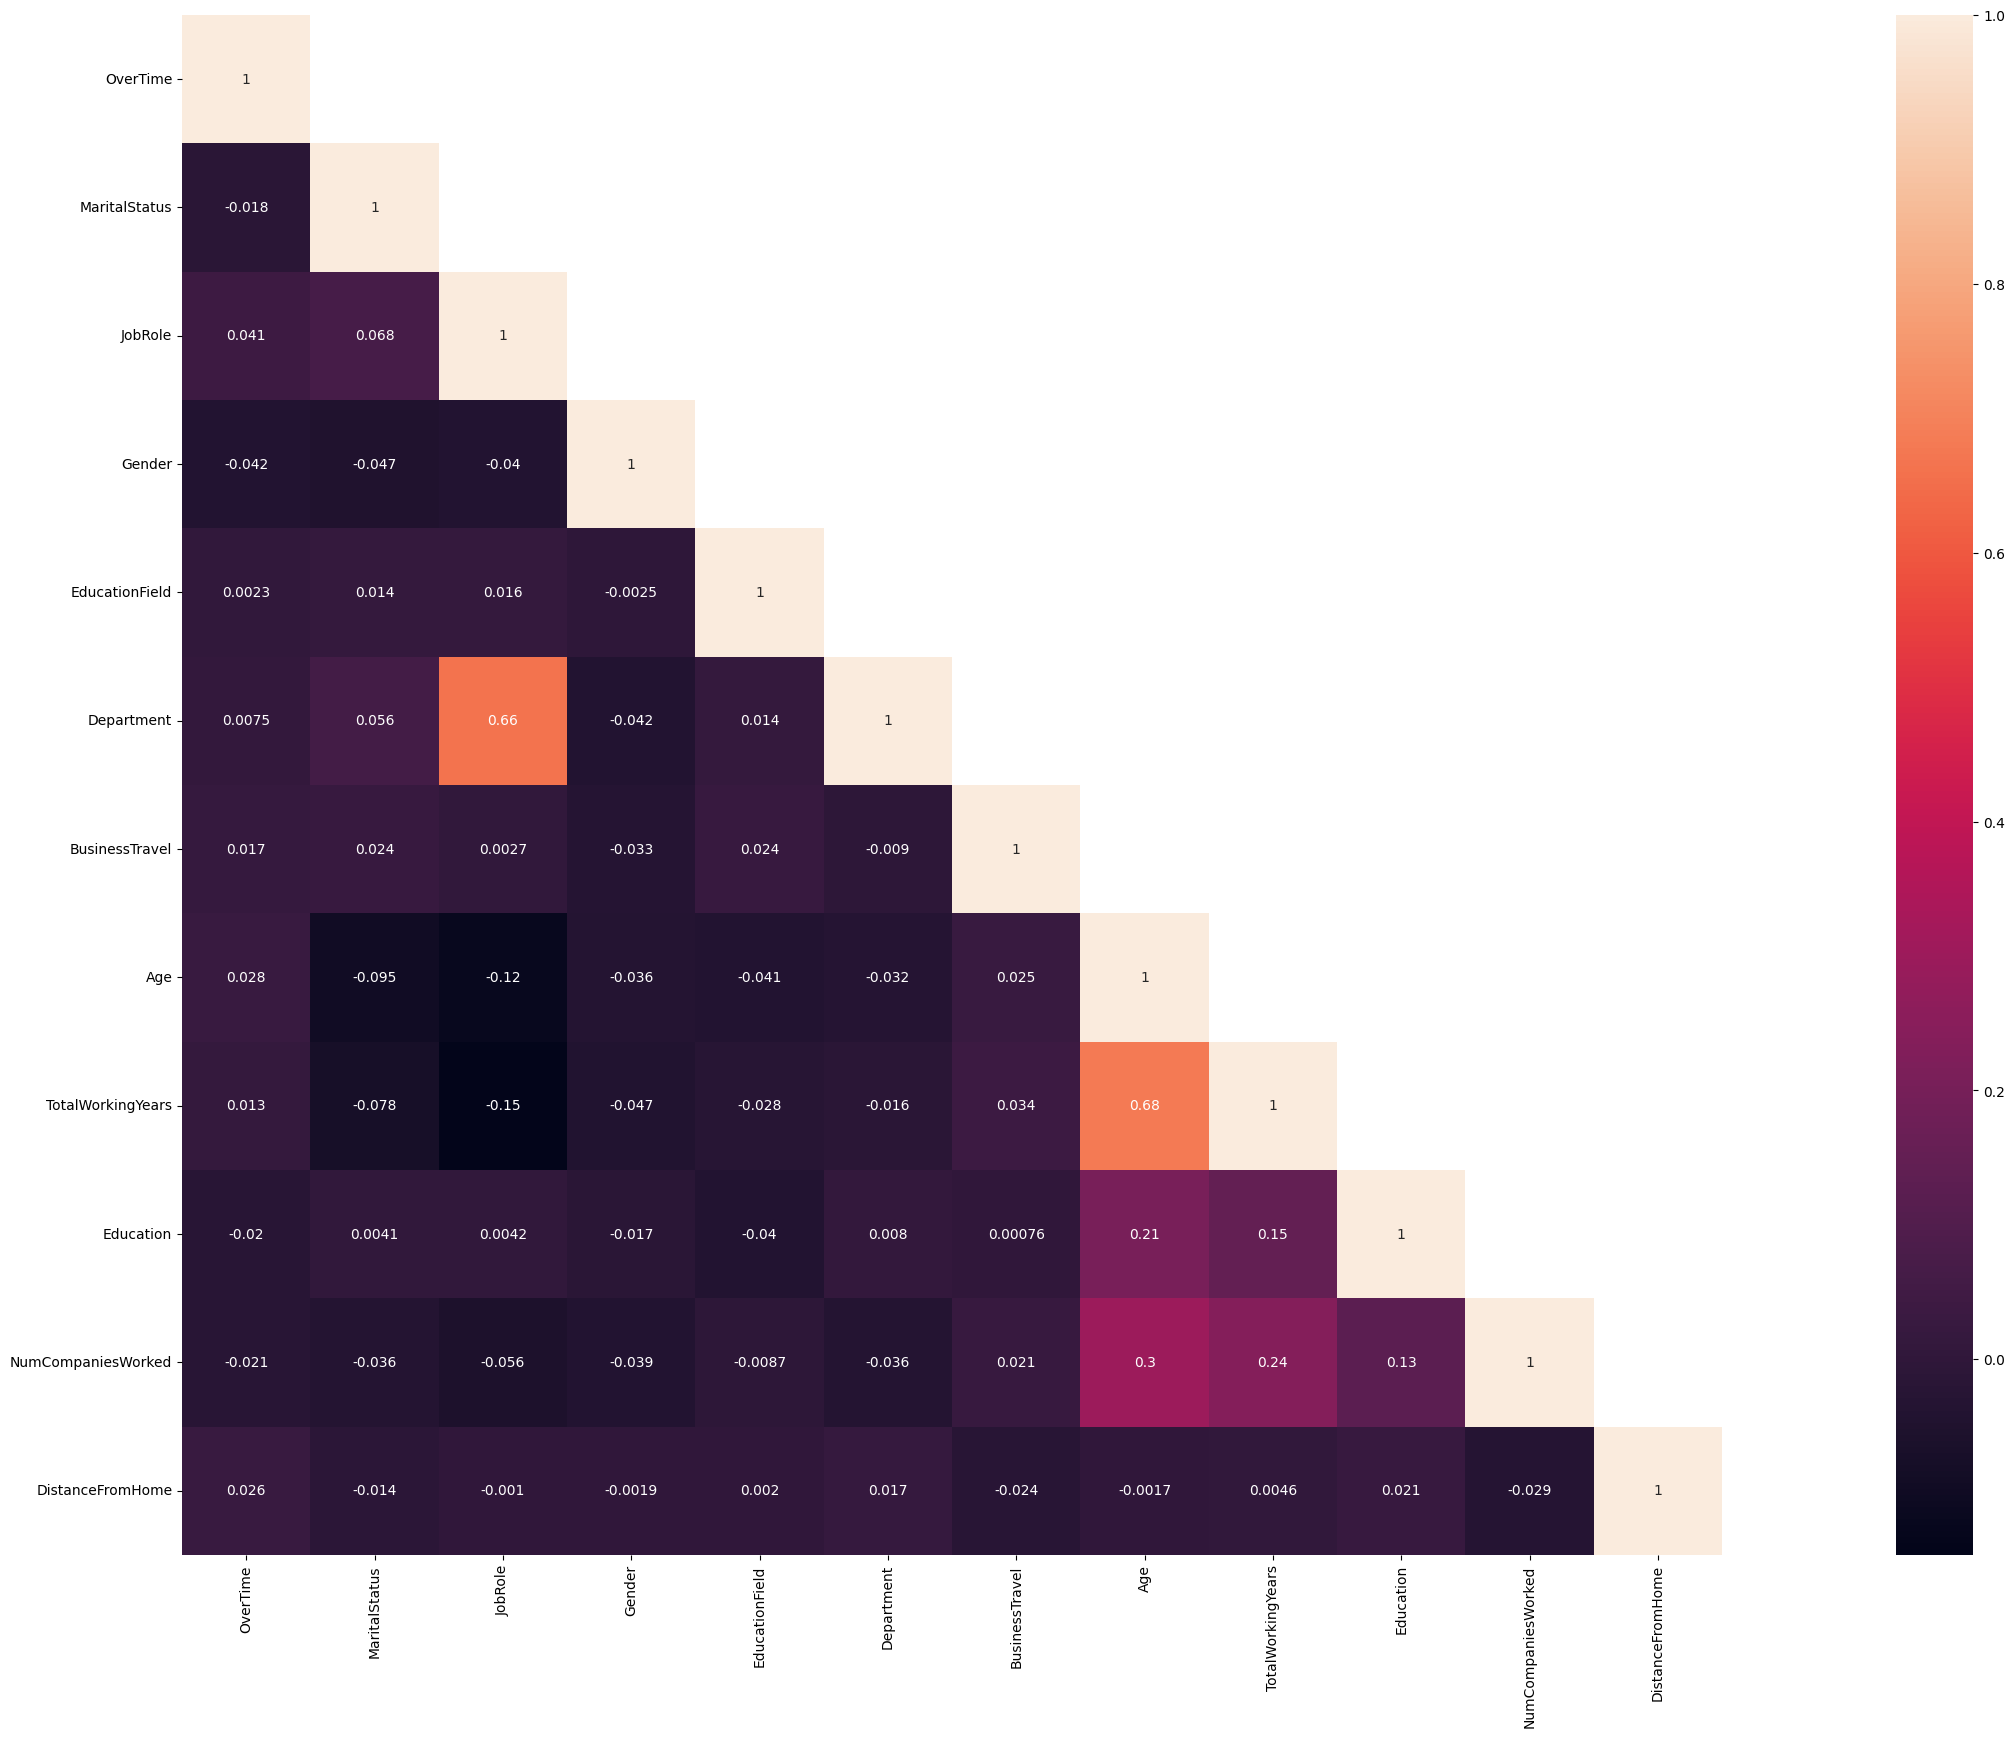

In [131]:
cor_mat= data1.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(45,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [132]:
value_counts = data['Attrition'].value_counts().reset_index()
value_counts.columns = ['Attrition', 'Count']
bar_chart_fig = px.bar(value_counts, x='Attrition', y='Count',
                       labels={'Attrition': 'Attrition', 'Count': 'Count'},
                       title='Attrition plot',
                       color='Attrition',
                       color_discrete_map={'Yes': 'blue', 'No': '#FECB52'})
bar_chart_fig.update_traces(marker=dict(line=dict(width=.5, color='DarkSlateGray')))
bar_chart_fig.update_layout(height=400, width=400)

In [133]:

attrition_counts = data['Attrition'].value_counts(normalize=True).reset_index()
attrition_counts.columns = ['Attrition', 'Count']
attrition_counts['Percentage'] = attrition_counts['Count'] * 100
bar_table = go.Figure(data=[go.Table(
    header=dict(values=['Attrition', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[attrition_counts['Attrition'], attrition_counts['Count'].round(2), attrition_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])
bar_table.update_layout(title='Summary Table')
bar_table.update_layout(
    title='Summary Table',
    height=300,
    width=400
)

In [138]:
# Assuming data is your DataFrame
df_counts = data.groupby(['OverTime', 'Age']).size().reset_index(name='Count')
fig = px.bar(df_counts, x='Age', y='Count', color='OverTime',
             labels={'Count': 'Number of Employees', 'Age': 'Age Group'},
             title='Relationship between Overtime and Age',
             barmode='stack')

fig.update_layout(xaxis_title='Age', yaxis_title='Number of Employees')

# Show the plot
fig.show()


In [ ]:
attrition_counts = data['Attrition'].value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'Count']

total_count = attrition_counts['Count'].sum()
attrition_counts['Percentage'] = (attrition_counts['Count'] / total_count) * 100

fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Attrition', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[attrition_counts['Attrition'],
                       attrition_counts['Count'],
                       attrition_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Summary Table for Attrition',
    height=300,
    width=500
)
fig_table.show()

In [ ]:
gender_pie_fig = px.pie(data['Gender'].value_counts().reset_index(),
                         names='Gender',
                         values='count',
                         title='Gender plot',
                         color='Gender',
                         color_discrete_map={'Male': '#B6E880', 'Female': '#FECB52'})
gender_pie_fig.update_layout(height=400, width=400)

In [ ]:
gender_counts = data['Gender'].value_counts(normalize=True).reset_index()
gender_counts.columns = ['Gender', 'Count']
gender_counts['Percentage'] = gender_counts['Count'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Gender', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[gender_counts['Gender'], gender_counts['Count'], gender_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Gender Summary Table',
    height=400,
    width=400
)

fig_table.show()

In [ ]:
marital_status_pie_fig = px.pie(data['MaritalStatus'].value_counts().reset_index(),
                                names='MaritalStatus',
                                values='count',
                                title='Marital Status',
                                color='MaritalStatus',
                                color_discrete_map={'Single': '#00CC96', 'Married': '#B6E880', 'Divorced': '#FECB52'})
marital_status_pie_fig.update_layout(height=400, width=400)

In [ ]:
marital_status_counts = data['MaritalStatus'].value_counts(normalize=True).reset_index()
marital_status_counts.columns = ['MaritalStatus', 'Count']
marital_status_counts['Percentage'] = marital_status_counts['Count'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Marital Status', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[marital_status_counts['MaritalStatus'], marital_status_counts['Count'].round(2), marital_status_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Marital Status Summary Table',
    height=400,
    width=400
)

fig_table.show()

In [ ]:
frequency_table_business_travel = data['BusinessTravel'].value_counts().reset_index()
frequency_table_business_travel.columns = ['BusinessTravel', 'Frequency']

business_travel_bar_fig = px.bar(frequency_table_business_travel, x='BusinessTravel', y='Frequency',
                                 title='Business Travel',
                                 color='BusinessTravel',
                                 color_discrete_sequence=['#00CC96', '#B6E880', '#FECB52']
                                 )

business_travel_bar_fig.update_layout(
    height=400,
    width=600,
    yaxis_title='Business Travel',
    xaxis_title='Frequency'
)

In [ ]:
frequency_table = data['BusinessTravel'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['BusinessTravel', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Business Travel', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['BusinessTravel'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Business Travel Frequency and Percentage Summary',
    height=400,
    width=400
)

fig_table.show()

In [ ]:
frequency_table_education_field = data['EducationField'].value_counts().reset_index()
frequency_table_education_field.columns = ['EducationField', 'Frequency']

# Bar chart for Education Field
education_field_bar_fig = px.bar(frequency_table_education_field, x='EducationField', y='Frequency',
                                title='EducationField',
                                color='EducationField',
                                color_discrete_sequence=['#00CC96', '#B6E880', '#FECB52']
                                )
education_field_bar_fig.update_layout(
    height=400,
    width=600,
    yaxis_title='EducationField',
    xaxis_title='Frequency'
)

In [ ]:
frequency_table = data['EducationField'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['EducationField', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['EducationField', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['EducationField'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='EducationField Frequency and Percentage Summary',
    height=400,
    width=500
)

fig_table.show()

In [ ]:
department_pie_fig = px.pie(data['Department'].value_counts().reset_index(),
                            names='Department',
                            values='count',
                            title='Department',
                            color='Department',
                            color_discrete_map={'Research & Development': '#00CC96', 'Human Resources': '#B6E880', 'Sales': '#FECB52'})

department_pie_fig.update_layout(height=400, width=500)

In [ ]:
frequency_table = data['Department'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['Department', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Department', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['Department'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Department Frequency and Percentage Summary',
    height=400,
    width=500
)

fig_table.show()

In [ ]:
overtime_pie_fig = px.pie(data['OverTime'].value_counts().reset_index(),
                          names='OverTime',
                          values='count',
                          title='OverTime',
                          color='OverTime',
                          color_discrete_map={'No': '#FECB52', 'Yes': 'red'})

overtime_pie_fig.update_layout(height=400, width=400)

In [ ]:
frequency_table = data['OverTime'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['OverTime', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['OverTime', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['OverTime'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='OverTime Frequency and Percentage Summary',
    height=400,
    width=400
)

fig_table.show()

Plot with target variable


In [ ]:
df = px.data.tips()
fig = px.box(data, x="Attrition", y="Age", points="all")

fig.update_traces(marker=dict(color='#00CC96'),
                  selector=dict(type='box'))
fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
summary = data.groupby('Attrition')['Age'].describe().reset_index()

# Display the summary table
print(summary)

   Attrition   count       mean      std   min   25%   50%   75%   max
0          0  1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1          1   237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0


In [ ]:
data.Age.mean()

36.923809523809524

In [ ]:
fig = px.box(data, x='JobRole', y='MonthlyIncome', color='Attrition')

fig.update_traces(marker=dict(color='#FF97FF'), selector=dict(type='box', name='No'))
fig.update_traces(marker=dict(color='#AB63FA'), selector=dict(type='box', name='Yes'))

fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=1100)
fig.show()

In [ ]:
summary_table = data.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].describe().reset_index()

# Renaming columns for better readability
summary_table = summary_table.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
})

print(summary_table)

    JobRole  Attrition  Count          Mean  Standard Deviation  Minimum  \
0         0          0  122.0   7453.557377         2560.464869   4000.0   
1         0          1    9.0   8548.222222         2152.779121   4777.0   
2         1          0   40.0   4391.750000         2241.002383   2064.0   
3         1          1   12.0   3715.750000         3063.978048   1555.0   
4         2          0  197.0   3337.223350         1172.985916   1129.0   
5         2          1   62.0   2919.258065         1019.798452   1102.0   
6         3          0   97.0  17201.484536         2245.643853  11244.0   
7         3          1    5.0  16797.400000         3788.619445  11849.0   
8         4          0  135.0   7289.925926         2688.997784   4011.0   
9         4          1   10.0   7365.500000         2641.278615   4171.0   
10        5          0   78.0  15947.346154         2810.948501  11031.0   
11        5          1    2.0  19395.500000          211.424928  19246.0   
12        6 

In [ ]:
fig = px.histogram(data, x="MonthlyIncome", color="Attrition")

fig.update_layout(
    height=500,
    width=800,
    title="Monthly Income by Attrition",
    xaxis_title="Monthly Income",
    yaxis_title="Count",
)

fig.show()

In [ ]:
summary_table = data.groupby('Attrition')['MonthlyIncome'].describe().reset_index()

# Renaming columns for better readability
summary_table = summary_table.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
})

print(summary_table)

   Attrition   Count         Mean  Standard Deviation  Minimum  \
0          0  1233.0  6832.739659         4818.208001   1051.0   
1          1   237.0  4787.092827         3640.210367   1009.0   

   25th Percentile  Median  75th Percentile  Maximum  
0           3211.0  5204.0           8834.0  19999.0  
1           2373.0  3202.0           5916.0  19859.0  


In [ ]:
fig = px.scatter_matrix(data, dimensions=["JobLevel", "TotalWorkingYears", "MonthlyIncome", "YearsInCurrentRole", "PerformanceRating"],
                        color="Attrition")

fig.update_layout(
    width=1000,
    height=1000,
    title='Scatter Matrix Plot',
)
fig.update_traces(marker=dict(color='purple'), selector=dict(mode='markers'))

fig.show()

In [ ]:
grouped_data = data.groupby(['JobRole', 'EducationField', 'Attrition']).size().reset_index(name='Count')

fig = px.bar(grouped_data, x='JobRole', y='Count', color='Attrition', barmode='group', facet_col='EducationField')

fig.update_layout(
    title="Attrition by Job Role and Education Field",
    xaxis_title="Job Role",
    yaxis_title="Count",
)

fig.show()

In [ ]:
summary_table = grouped_data.groupby(['JobRole', 'EducationField', 'Attrition'])['Count'].describe()

summary_table.head()

count  mean  std   min   25%   50%   75%  \
JobRole EducationField Attrition                                             
0       1              0            1.0  58.0  NaN  58.0  58.0  58.0  58.0   
                       1            1.0   2.0  NaN   2.0   2.0   2.0   2.0   
        3              0            1.0  43.0  NaN  43.0  43.0  43.0  43.0   
                       1            1.0   5.0  NaN   5.0   5.0   5.0   5.0   
        4              0            1.0   8.0  NaN   8.0   8.0   8.0   8.0   

                                   max  
JobRole EducationField Attrition        
0       1              0          58.0  
                       1           2.0  
        3              0          43.0  
                       1           5.0  
        4              0           8.0

In [ ]:
fig = px.box(data, x='BusinessTravel', y='MaritalStatus', color='Attrition')

fig.update_traces(marker=dict(color='#FF97FF'), selector=dict(type='box', name='No'))
fig.update_traces(marker=dict(color='#AB63FA'), selector=dict(type='box', name='Yes'))

fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=1100)
fig.show()

In [ ]:
summary_table = data.groupby(['BusinessTravel', 'MaritalStatus', 'Attrition']).size().reset_index(name='Count')

summary_table_pivot = summary_table.pivot_table(index=['BusinessTravel', 'MaritalStatus'], columns='Attrition', values='Count', fill_value=0)

print(summary_table_pivot)

Attrition                       0   1
BusinessTravel MaritalStatus         
0              0               43   1
               1               56   3
               2               39   8
1              0               50  13
               1               99  19
               2               59  37
2              0              201  19
               1              434  62
               2              252  75


In [ ]:
fig = px.scatter_matrix(data, dimensions=['MonthlyIncome', 'DistanceFromHome'],
                        color='Attrition', title='Relationship between Monthly Income, Hourly Rate, Distance from Home, and Attrition')

fig.update_traces(diagonal_visible=False)

fig.show()

In [ ]:
numeric_columns = ['MonthlyIncome', 'DistanceFromHome']

summary_table = data.groupby('Attrition')[numeric_columns].describe().T.reset_index()

summary_table = summary_table.rename(columns={
    'index': 'Variable',
    'level_1': 'Statistical Measure'
})

print(summary_table)

Attrition           level_0 Statistical Measure             0             1
0             MonthlyIncome               count   1233.000000    237.000000
1             MonthlyIncome                mean   6832.739659   4787.092827
2             MonthlyIncome                 std   4818.208001   3640.210367
3             MonthlyIncome                 min   1051.000000   1009.000000
4             MonthlyIncome                 25%   3211.000000   2373.000000
5             MonthlyIncome                 50%   5204.000000   3202.000000
6             MonthlyIncome                 75%   8834.000000   5916.000000
7             MonthlyIncome                 max  19999.000000  19859.000000
8          DistanceFromHome               count   1233.000000    237.000000
9          DistanceFromHome                mean      8.915653     10.632911
10         DistanceFromHome                 std      8.012633      8.452525
11         DistanceFromHome                 min      1.000000      1.000000
12         D